# Analysis of USA technology companies
## Andryunichev Valery
## 14.February's.2019

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
os.chdir('C:/Users/Auriliano/Documents/Стратегии')
data = pd.read_csv('indicators_file_yahoo.csv')
data.head()

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
0,DDD,3D Systems Corporation,Technology,Computer Software: Prepackaged Software,2.045077e+09,-0.46,-26.52,2.00,0.42,0.00
1,MMM,3M Company,Health Care,Medical/Dental Instruments,1.233179e+11,7.64,25.57,3.53,0.09,5.24
2,EGHT,8x8 Inc,Technology,EDP Services,1.816977e+09,-1.47,-11.86,6.35,0.14,0.00
4,AHC,A.H. Belo Corporation,Consumer Services,Newspapers/Magazines,9.687409e+07,0.33,13.41,0.45,NaN,0.47
5,AOS,A.O Smith Corporation,Consumer Durables,Consumer Electronics/Appliances,1.363486e+09,1.99,22.99,2.49,1.47,0.68


In [2]:
data.Sector.unique()

array(['Technology', 'Health Care', 'Consumer Services',
       'Consumer Durables', 'Capital Goods', 'Finance', 'Miscellaneous',
       'Basic Industries', 'Transportation', 'Public Utilities',
       'Consumer Non-Durables', 'Energy', nan], dtype=object)

In [3]:
finance_small = list(data[data.Sector == 'Technology'].MarketCap.nsmallest(10).index)
finance_large = list(data[data.Sector == 'Technology'].MarketCap.nlargest(10).index)
sample = data.loc[finance_small + finance_large,:]
sample=data.loc[finance_small+finance_large,:]
sample_tickers=list(sample.Ticker)
sample.head()

,Ticker,Name,Sector,Industry,MarketCap,EPS,PE,PS,BookMarket,DivRatio
926,BVSN,"BroadVision, Inc.",Technology,Computer Software: Prepackaged Software,9989776.0,-1.56,-1.02,1.51,0.34,0.0
1338,IPDN,"Professional Diversity Network, Inc.",Technology,"Computer Software: Programming, Data Processing",12787937.0,-3.66,-0.45,0.44,0.32,0.0
1464,TSRI,"TSR, Inc.",Technology,EDP Services,13440125.0,0.20,35.87,0.21,0.60,0.0
1380,LEDS,SemiLEDS Corporation,Technology,Semiconductors,15792148.0,-0.84,-4.11,1.63,NaN,0.0
1412,STRM,"Streamline Health Solutions, Inc.",Technology,EDP Services,23446675.0,-0.14,-6.18,0.73,0.53,0.0


In [4]:
print(sample_tickers)

['BVSN', 'IPDN', 'TSRI', 'LEDS', 'STRM', 'SGMA', 'CNET', 'ISSC', 'MIND', 'LPTH', 'AAPL', 'MSFT', 'GOOG', 'FB', 'INTC', 'CSCO', 'ORCL', 'NVDA', 'IBM', 'ADBE']


In [5]:
df = pandas_datareader.DataReader(sample_tickers, 
                       start='2016-12-29', 
                       end='2018-12-31', 
                       data_source='yahoo')['Close']

In [6]:
df.to_csv('sample.csv')
df.dropna(inplace = True)

In [7]:
prices=pd.read_csv('sample.csv',index_col='Date',parse_dates=True)

In [8]:
returns = df.copy()
returns = returns.pct_change()
returns = returns.iloc[1:,:]

In [9]:
returns_cum = (1+returns).cumprod()
returns_cum.head(1)

Symbols,AAPL,ADBE,BVSN,CNET,CSCO,FB,GOOG,IBM,INTC,IPDN,ISSC,LEDS,LPTH,MIND,MSFT,NVDA,ORCL,SGMA,STRM,TSRI
Date,,,,,,,,,,,,,,,,,,,,
2018-01-17,1.016516,1.020939,0.971014,0.929907,1.01628,0.995572,1.009111,1.029295,1.028975,1.019093,0.961905,1.131387,1.021187,0.969072,1.02026,1.020944,1.013712,1.025613,1.02924,1.023438


In [10]:
returns_cum.tail(1)

Symbols,AAPL,ADBE,BVSN,CNET,CSCO,FB,GOOG,IBM,INTC,IPDN,ISSC,LEDS,LPTH,MIND,MSFT,NVDA,ORCL,SGMA,STRM,TSRI
Date,,,,,,,,,,,,,,,,,,,,
2018-12-31,0.895284,1.175517,0.330435,0.313084,1.068821,0.734851,0.923201,0.693744,1.087854,0.238663,0.71746,0.656934,0.631356,0.659794,1.149632,0.606515,0.910466,0.261693,0.473684,0.726563


In [11]:
sample.drop(columns=['Industry'],inplace=True)
sample.reset_index(drop=True,inplace=True)
df=pd.DataFrame(returns_cum.iloc[returns_cum.shape[0]-1,:])
df.columns=['Return']
df['Ticker']=df.index
df.reset_index(drop=True,inplace=True)
df.head()

,Return,Ticker
0,0.895284,AAPL
1,1.175517,ADBE
2,0.330435,BVSN
3,0.313084,CNET
4,1.068821,CSCO


In [12]:
sample.head()

,Ticker,Name,Sector,MarketCap,EPS,PE,PS,BookMarket,DivRatio
0,BVSN,"BroadVision, Inc.",Technology,9989776.0,-1.56,-1.02,1.51,0.34,0.0
1,IPDN,"Professional Diversity Network, Inc.",Technology,12787937.0,-3.66,-0.45,0.44,0.32,0.0
2,TSRI,"TSR, Inc.",Technology,13440125.0,0.20,35.87,0.21,0.60,0.0
3,LEDS,SemiLEDS Corporation,Technology,15792148.0,-0.84,-4.11,1.63,NaN,0.0
4,STRM,"Streamline Health Solutions, Inc.",Technology,23446675.0,-0.14,-6.18,0.73,0.53,0.0


In [13]:
sample=sample.merge(df)
sector_group=sample.iloc[:,2:].groupby('Sector')

In [14]:
sample.head()

,Ticker,Name,Sector,MarketCap,EPS,PE,PS,BookMarket,DivRatio,Return
0,BVSN,"BroadVision, Inc.",Technology,9989776.0,-1.56,-1.02,1.51,0.34,0.0,0.330435
1,IPDN,"Professional Diversity Network, Inc.",Technology,12787937.0,-3.66,-0.45,0.44,0.32,0.0,0.238663
2,TSRI,"TSR, Inc.",Technology,13440125.0,0.20,35.87,0.21,0.60,0.0,0.726563
3,LEDS,SemiLEDS Corporation,Technology,15792148.0,-0.84,-4.11,1.63,NaN,0.0,0.656934
4,STRM,"Streamline Health Solutions, Inc.",Technology,23446675.0,-0.14,-6.18,0.73,0.53,0.0,0.473684


In [15]:
sample.tail()

,Ticker,Name,Sector,MarketCap,EPS,PE,PS,BookMarket,DivRatio,Return
15,CSCO,"Cisco Systems, Inc.",Technology,2.200183e+11,0.27,177.63,4.47,0.21,1.27,1.068821
16,ORCL,Oracle Corporation,Technology,1.964700e+11,0.97,49.97,4.94,0.21,0.76,0.910466
17,NVDA,NVIDIA Corporation,Technology,1.759309e+11,7.73,19.16,7.24,0.10,0.60,0.606515
18,IBM,International Business Machines Corporation,Technology,1.360298e+11,6.23,19.27,1.37,0.18,6.14,0.693744
19,ADBE,Adobe Inc.,Technology,1.332182e+11,4.91,48.46,13.65,0.08,0.00,1.175517


In [16]:
sample[sample.Sector=='Technology'][['Ticker','Return']].sort_values(by='Return',ascending=False)

,Ticker,Return
19,ADBE,1.175517
11,MSFT,1.149632
14,INTC,1.087854
15,CSCO,1.068821
12,GOOG,0.923201
16,ORCL,0.910466
10,AAPL,0.895284
13,FB,0.734851
2,TSRI,0.726563
7,ISSC,0.717460


In [17]:
sample['PE'].groupby(pd.qcut(sample.Return,4)).agg(np.median)

Return
(0.238, 0.573]    -1.47
(0.573, 0.706]    19.16
(0.706, 0.914]    22.53
(0.914, 1.176]    45.76
Name: PE, dtype: float64

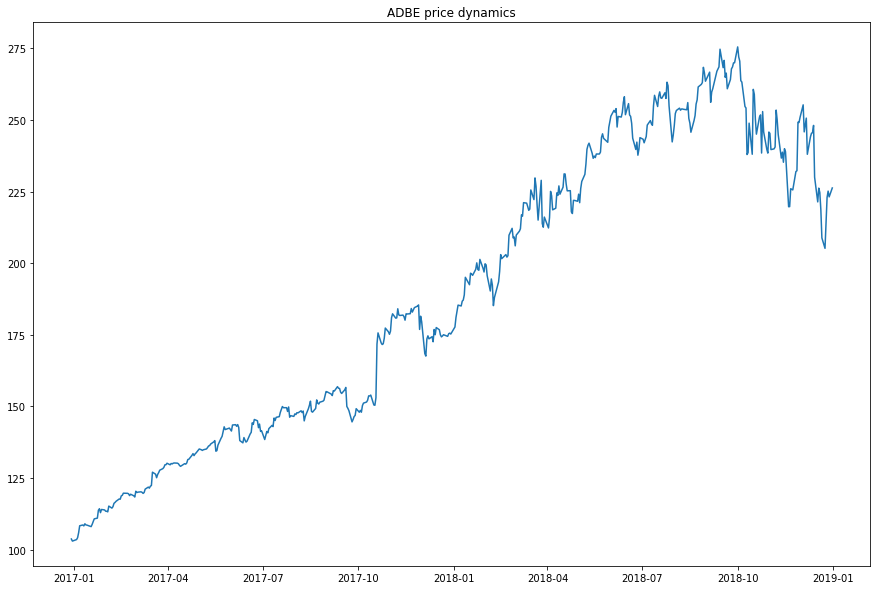

In [18]:
plt.figure(figsize=(15,10))
_=plt.plot(prices.ADBE)
_=plt.title('ADBE price dynamics')

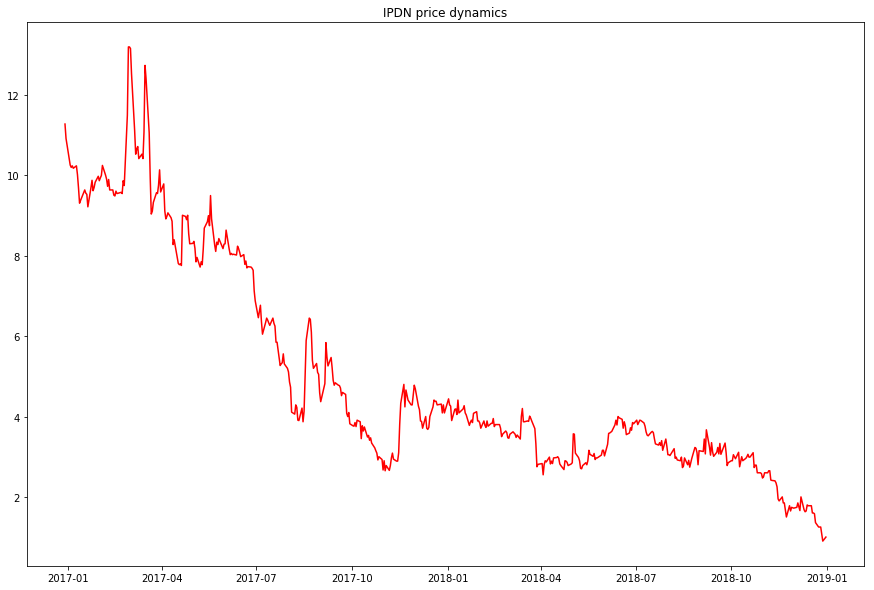

In [19]:
plt.figure(figsize=(15,10))
_=plt.plot(prices.IPDN, color = 'red')
_=plt.title('IPDN price dynamics')

In [20]:
tickers_fin=list(sample[sample.Sector=='Technology']['Ticker'])

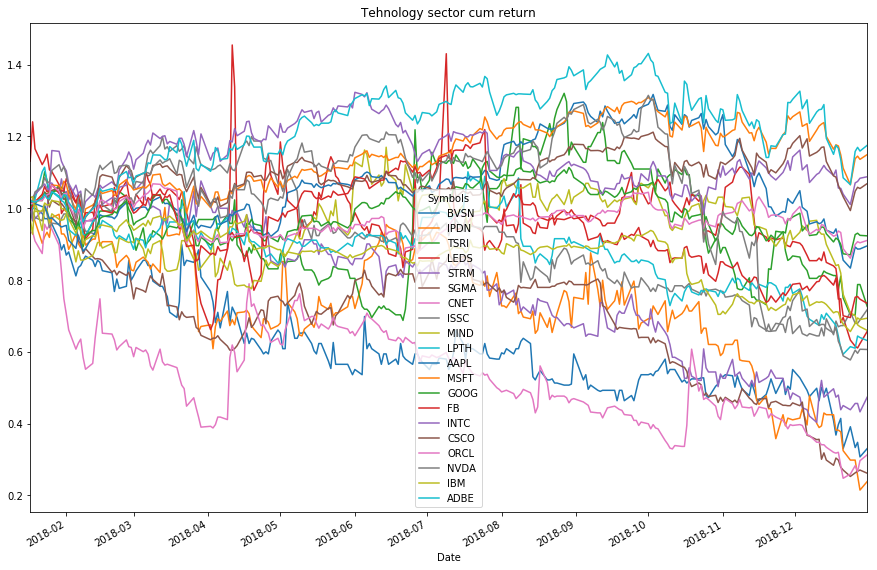

In [21]:
p=returns_cum[tickers_fin].plot(figsize=(15,10),title='Tehnology sector cum return')

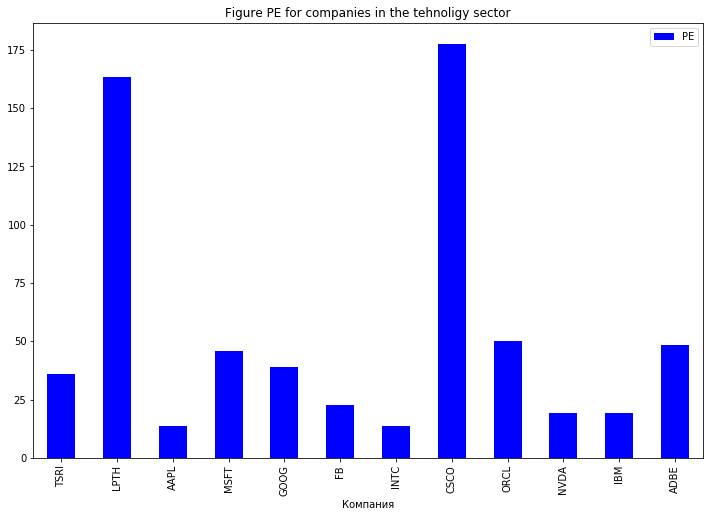

In [22]:
p=sample[(sample.Sector=='Technology')&(sample.PE>0)].plot(x='Ticker',y='PE',kind='bar',
title=u'Figure PE for companies in the tehnoligy sector',figsize=(12,8),color=['blue'])
_=p.set(xlabel=u'Компания')

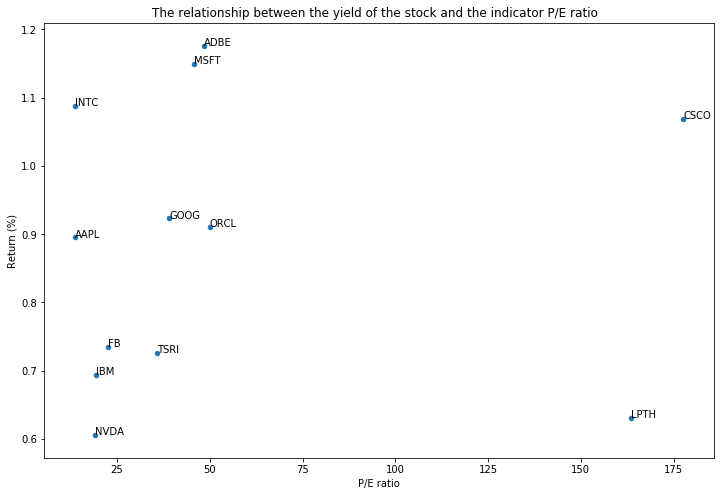

In [23]:
p=sample[(sample.PE>0)&(sample.PE<200)].plot.scatter(x='PE',y='Return',
title=u'The relationship between the yield of the stock and the indicator P/E ratio  ',figsize=(12,8))
_=p.set(xlabel='P/E ratio',ylabel='Return (%)')
for  i, point in sample[(sample.PE>0)&(sample.PE<200)].iterrows():
    p.text(point['PE'], point['Return'], str(point['Ticker']))

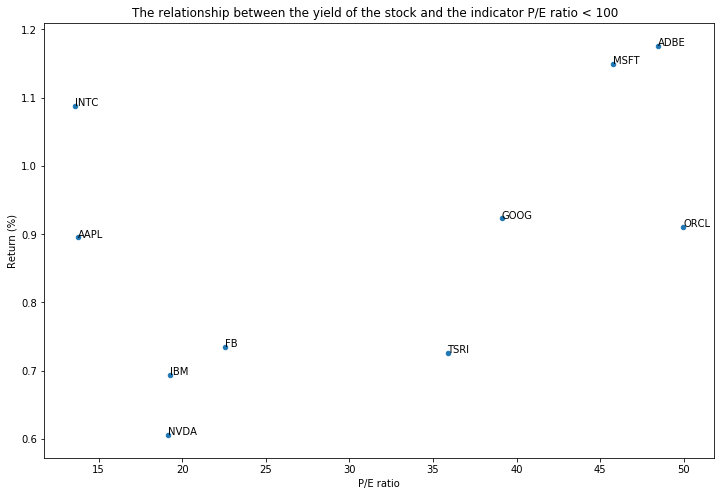

In [24]:
p=sample[(sample.PE>0)&(sample.PE<100)].plot.scatter(x='PE',y='Return',
title=u'The relationship between the yield of the stock and the indicator P/E ratio < 100  ',figsize=(12,8))
_=p.set(xlabel='P/E ratio',ylabel='Return (%)')
for  i, point in sample[(sample.PE>0)&(sample.PE<100)].iterrows():
    p.text(point['PE'], point['Return'], str(point['Ticker']))

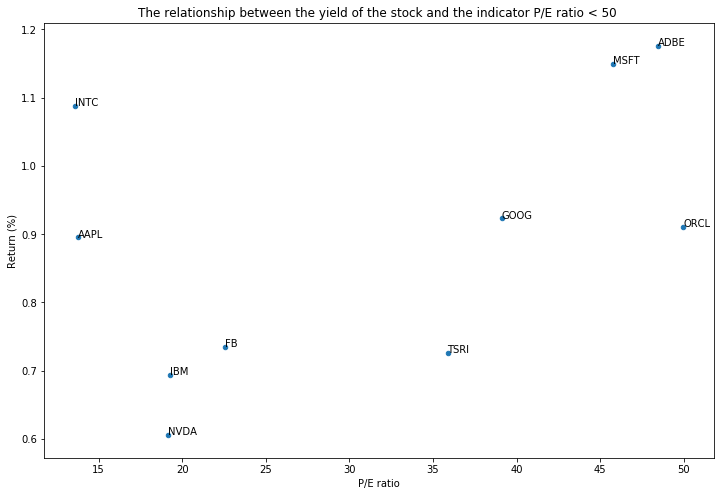

In [25]:
p=sample[(sample.PE>0)&(sample.PE<50)].plot.scatter(x='PE',y='Return',
title=u'The relationship between the yield of the stock and the indicator P/E ratio < 50 ',figsize=(12,8))
_=p.set(xlabel='P/E ratio',ylabel='Return (%)')
for  i, point in sample[(sample.PE>0)&(sample.PE<50)].iterrows():
    p.text(point['PE'], point['Return'], str(point['Ticker']))

In [26]:
window_1=12
window_2=24

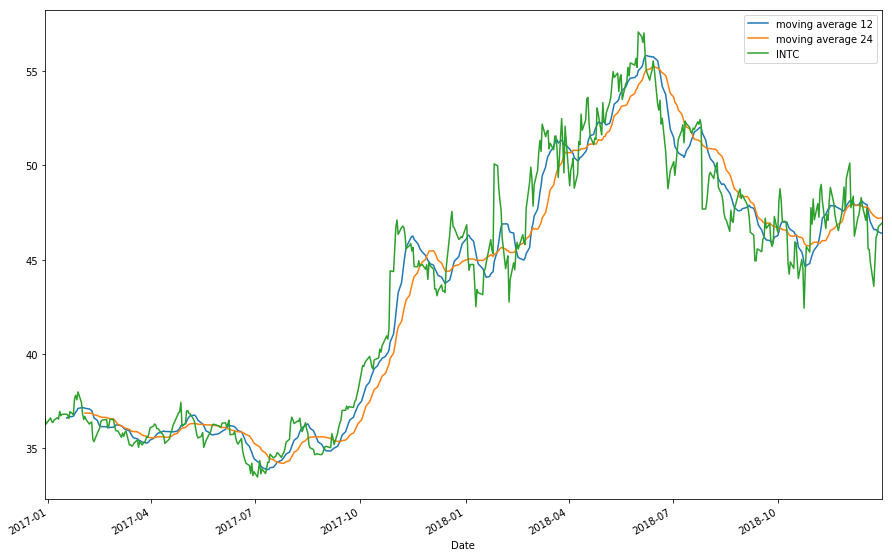

In [27]:
plt.figure(figsize=(15,10))
_=prices['INTC'].rolling(window_1).mean().plot(label='moving average '+str(window_1))
_=prices['INTC'].rolling(window_2).mean().plot(label='moving average '+str(window_2))
_=prices['INTC'].plot()
_=plt.legend()

In [28]:
df_ewm=pd.DataFrame(zip(prices['INTC'].ewm(span=12).mean(),prices['INTC'].ewm(span=26).mean()),\
          columns=['EWMA_12','EWMA_26'])
df_ewm['Buy'] = np.where( (df_ewm['EWMA_12']> df_ewm['EWMA_26']), 1, 0)
df_ewm['Sell'] = np.where( (df_ewm['EWMA_12']< df_ewm['EWMA_26']), 1, 0)
df_ewm['Buy_ind'] = np.where( (df_ewm['Buy'] > df_ewm['Buy'].shift(1)),1,0)
df_ewm['Sell_ind'] = np.where( (df_ewm['Sell'] > df_ewm['Sell'].shift(1)),1,0)
df_ewm.index=prices.index
df_ewm['Price']=prices['INTC']

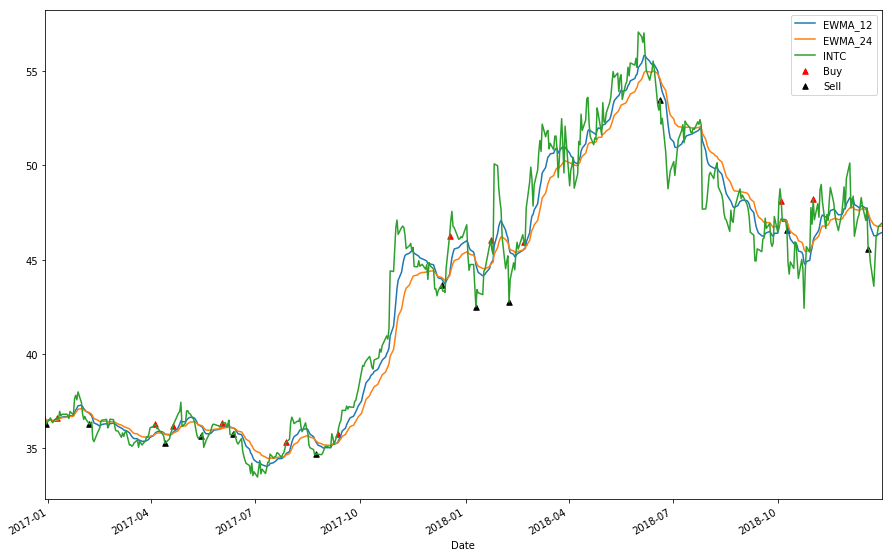

In [29]:
plt.figure(figsize=(15,10))
_=prices['INTC'].ewm(span=window_1).mean().plot(label='EWMA_'+str(window_1))
_=prices['INTC'].ewm(span=window_2).mean().plot(label='EWMA_'+str(window_2))
_=plt.scatter(df_ewm[df_ewm['Buy_ind'] ==1 ].index,df_ewm[df_ewm['Buy_ind'] ==1]['Price'], label='Buy', color='red', s=30, marker="^")
_=plt.scatter(df_ewm[df_ewm['Sell_ind'] ==1 ].index,df_ewm[df_ewm['Sell_ind'] ==1]['Price'], label='Sell', color='black', s=30, marker="^")
_=prices['INTC'].plot()
_=plt.legend()

Провери стратегию на других акциях

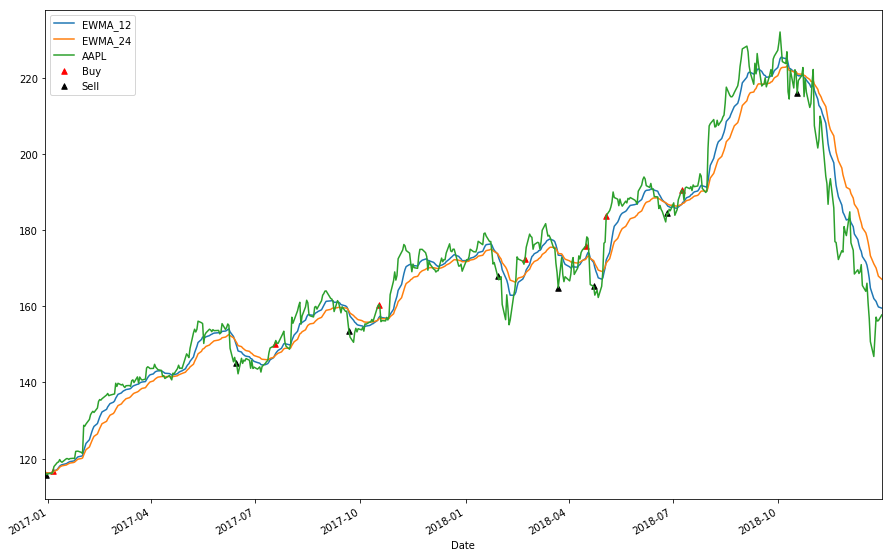

In [30]:
df_ewm=pd.DataFrame(zip(prices['AAPL'].ewm(span=12).mean(),prices['AAPL'].ewm(span=26).mean()),\
          columns=['EWMA_12','EWMA_26'])
df_ewm['Buy'] = np.where( (df_ewm['EWMA_12']> df_ewm['EWMA_26']), 1, 0)
df_ewm['Sell'] = np.where( (df_ewm['EWMA_12']< df_ewm['EWMA_26']), 1, 0)
df_ewm['Buy_ind'] = np.where( (df_ewm['Buy'] > df_ewm['Buy'].shift(1)),1,0)
df_ewm['Sell_ind'] = np.where( (df_ewm['Sell'] > df_ewm['Sell'].shift(1)),1,0)
df_ewm.index=prices.index
df_ewm['Price']=prices['AAPL']
plt.figure(figsize=(15,10))
_=prices['AAPL'].ewm(span=window_1).mean().plot(label='EWMA_'+str(window_1))
_=prices['AAPL'].ewm(span=window_2).mean().plot(label='EWMA_'+str(window_2))
_=plt.scatter(df_ewm[df_ewm['Buy_ind'] ==1 ].index,df_ewm[df_ewm['Buy_ind'] ==1]['Price'], label='Buy', color='red', s=30, marker="^")
_=plt.scatter(df_ewm[df_ewm['Sell_ind'] ==1 ].index,df_ewm[df_ewm['Sell_ind'] ==1]['Price'], label='Sell', color='black', s=30, marker="^")
_=prices['AAPL'].plot()
_=plt.legend()


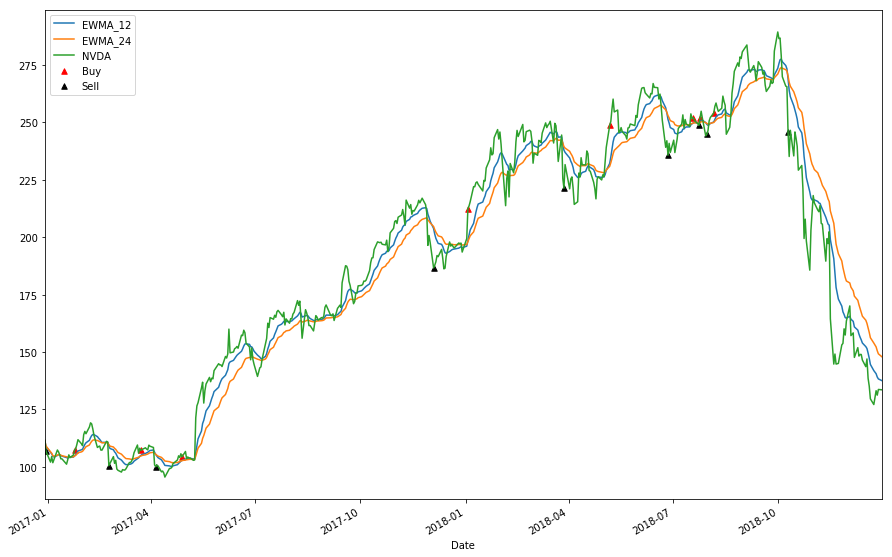

In [31]:
df_ewm=pd.DataFrame(zip(prices['NVDA'].ewm(span=12).mean(),prices['NVDA'].ewm(span=26).mean()),\
          columns=['EWMA_12','EWMA_26'])
df_ewm['Buy'] = np.where( (df_ewm['EWMA_12']> df_ewm['EWMA_26']), 1, 0)
df_ewm['Sell'] = np.where( (df_ewm['EWMA_12']< df_ewm['EWMA_26']), 1, 0)
df_ewm['Buy_ind'] = np.where( (df_ewm['Buy'] > df_ewm['Buy'].shift(1)),1,0)
df_ewm['Sell_ind'] = np.where( (df_ewm['Sell'] > df_ewm['Sell'].shift(1)),1,0)
df_ewm.index=prices.index
df_ewm['Price']=prices['NVDA']
plt.figure(figsize=(15,10))
_=prices['NVDA'].ewm(span=window_1).mean().plot(label='EWMA_'+str(window_1))
_=prices['NVDA'].ewm(span=window_2).mean().plot(label='EWMA_'+str(window_2))
_=plt.scatter(df_ewm[df_ewm['Buy_ind'] ==1 ].index,df_ewm[df_ewm['Buy_ind'] ==1]['Price'], label='Buy', color='red', s=30, marker="^")
_=plt.scatter(df_ewm[df_ewm['Sell_ind'] ==1 ].index,df_ewm[df_ewm['Sell_ind'] ==1]['Price'], label='Sell', color='black', s=30, marker="^")
_=prices['NVDA'].plot()
_=plt.legend()

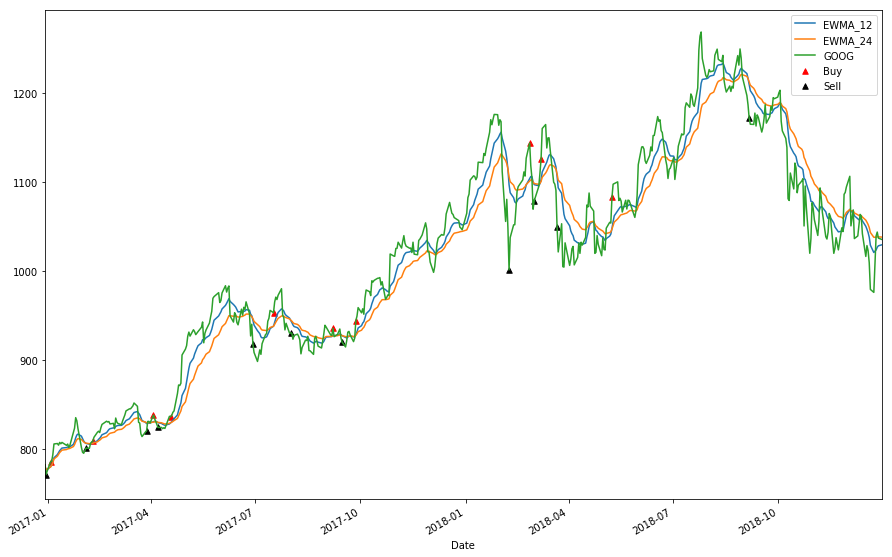

In [32]:
df_ewm=pd.DataFrame(zip(prices['GOOG'].ewm(span=12).mean(),prices['GOOG'].ewm(span=26).mean()),\
          columns=['EWMA_12','EWMA_26'])
df_ewm['Buy'] = np.where( (df_ewm['EWMA_12']> df_ewm['EWMA_26']), 1, 0)
df_ewm['Sell'] = np.where( (df_ewm['EWMA_12']< df_ewm['EWMA_26']), 1, 0)
df_ewm['Buy_ind'] = np.where( (df_ewm['Buy'] > df_ewm['Buy'].shift(1)),1,0)
df_ewm['Sell_ind'] = np.where( (df_ewm['Sell'] > df_ewm['Sell'].shift(1)),1,0)
df_ewm.index=prices.index
df_ewm['Price']=prices['GOOG']
plt.figure(figsize=(15,10))
_=prices['GOOG'].ewm(span=window_1).mean().plot(label='EWMA_'+str(window_1))
_=prices['GOOG'].ewm(span=window_2).mean().plot(label='EWMA_'+str(window_2))
_=plt.scatter(df_ewm[df_ewm['Buy_ind'] ==1 ].index,df_ewm[df_ewm['Buy_ind'] ==1]['Price'], label='Buy', color='red', s=30, marker="^")
_=plt.scatter(df_ewm[df_ewm['Sell_ind'] ==1 ].index,df_ewm[df_ewm['Sell_ind'] ==1]['Price'], label='Sell', color='black', s=30, marker="^")
_=prices['GOOG'].plot()
_=plt.legend()

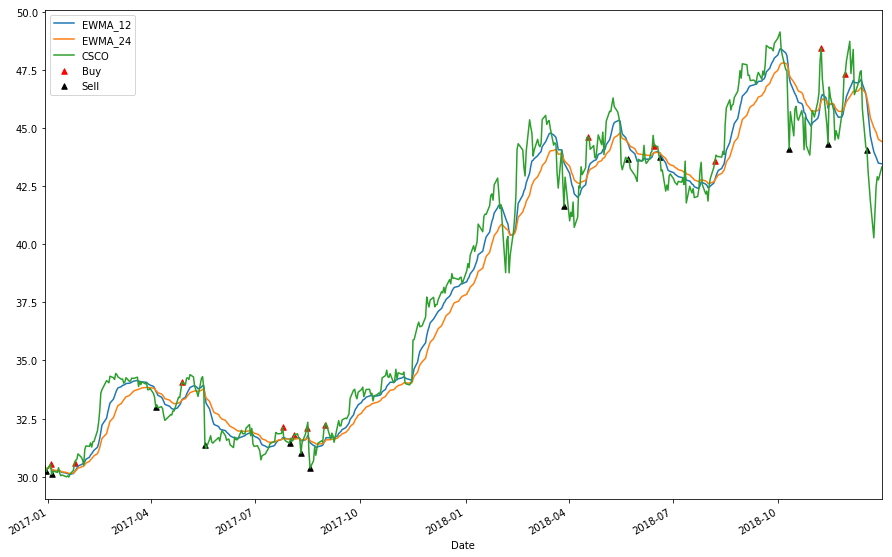

In [33]:
df_ewm=pd.DataFrame(zip(prices['CSCO'].ewm(span=12).mean(),prices['CSCO'].ewm(span=26).mean()),\
          columns=['EWMA_12','EWMA_26'])
df_ewm['Buy'] = np.where( (df_ewm['EWMA_12']> df_ewm['EWMA_26']), 1, 0)
df_ewm['Sell'] = np.where( (df_ewm['EWMA_12']< df_ewm['EWMA_26']), 1, 0)
df_ewm['Buy_ind'] = np.where( (df_ewm['Buy'] > df_ewm['Buy'].shift(1)),1,0)
df_ewm['Sell_ind'] = np.where( (df_ewm['Sell'] > df_ewm['Sell'].shift(1)),1,0)
df_ewm.index=prices.index
df_ewm['Price']=prices['CSCO']
plt.figure(figsize=(15,10))
_=prices['CSCO'].ewm(span=window_1).mean().plot(label='EWMA_'+str(window_1))
_=prices['CSCO'].ewm(span=window_2).mean().plot(label='EWMA_'+str(window_2))
_=plt.scatter(df_ewm[df_ewm['Buy_ind'] ==1 ].index,df_ewm[df_ewm['Buy_ind'] ==1]['Price'], label='Buy', color='red', s=30, marker="^")
_=plt.scatter(df_ewm[df_ewm['Sell_ind'] ==1 ].index,df_ewm[df_ewm['Sell_ind'] ==1]['Price'], label='Sell', color='black', s=30, marker="^")
_=prices['CSCO'].plot()
_=plt.legend()